In [22]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [23]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CONSUMPTION,DOMINV,REXP,RIMP,output
0,10319.160420,2367.003360,1259.935087,1898.251033,15348.118469
1,10395.985886,2307.639723,1293.919733,1909.823607,15420.194410
2,10534.744473,2400.743777,1299.030187,1938.074173,15655.328053
3,10487.298861,2300.662207,1279.861737,1985.154333,15456.107019
4,10581.355517,2383.149310,1277.321348,2026.600707,15604.303183
5,10761.601854,2296.067720,1317.032799,2062.779517,15777.776950
6,10939.647175,2400.112333,1351.660797,2066.500733,16117.981233
7,10983.395821,2341.845097,1355.715754,2087.185150,16117.428164
8,10938.396452,2308.929027,1336.574844,2094.980823,16011.613715
9,11058.282581,2395.751660,1335.447102,2126.085790,16210.372894


In [24]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

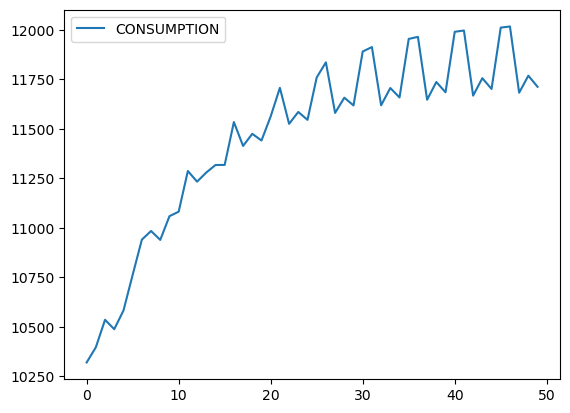

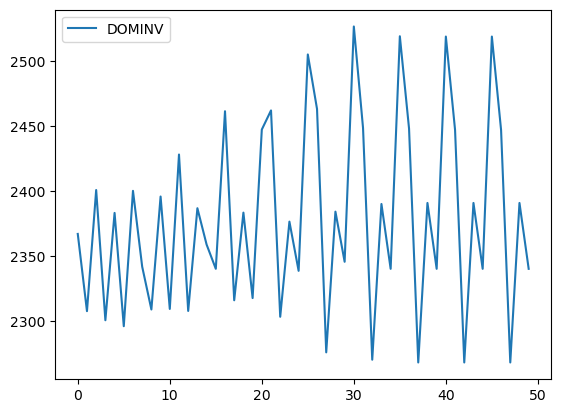

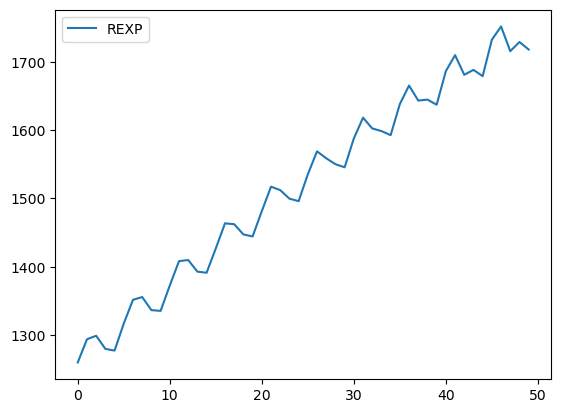

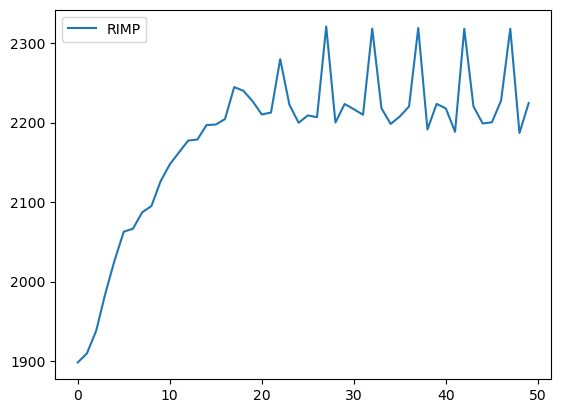

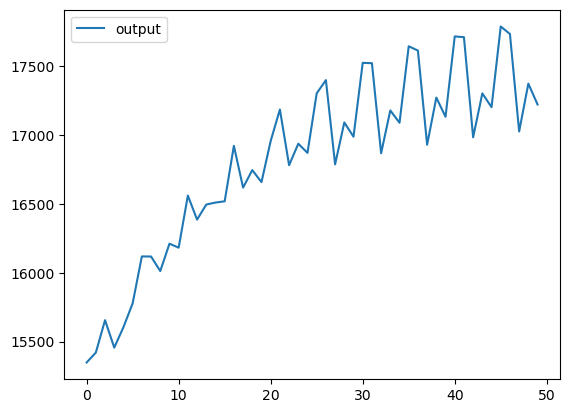

<Figure size 640x480 with 0 Axes>

In [25]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

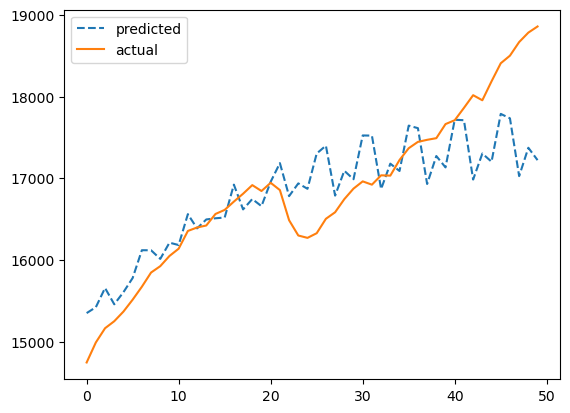

In [26]:
pred = df['output']
act = act.iloc[5:55].reset_index(drop=True)

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [27]:
r2_score(act, pred)

0.6557970930158772

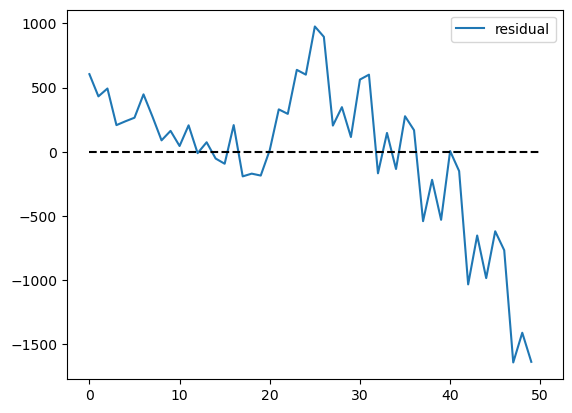

In [28]:
(pred - act['RGDP']).plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()